<div align="center">
    <img src="../../Images/javeriana.PNG" width="800" height="600">
</div>

**Juan David Villate Lemus**

**José Rafael Peña Gutiérrez**

**Laura Katherine Moreno Giraldo**

**William Ricardo Fernández Garnica**

## Movie Genre Classification

Classify a movie genre based on its plot.

<img src="https://raw.githubusercontent.com/sergiomora03/AdvancedTopicsAnalytics/main/notebooks/img/moviegenre.png"
     style="float: left; margin-right: 10px;" />



### Data

Input:
- movie plot

Output:
Probability of the movie belong to each genre


### Evaluation

- 30% Report with all the details of the solution, the analysis and the conclusions. The report cannot exceed 10 pages, must be send in PDF format and must be self-contained.
- 30% Code with the data processing and models developed that support the reported results.
- 30% Presentation of no more than 15 minutes with the main results of the project.
- 10% Model performance achieved. Metric: "AUC".

• The project must be carried out in groups of 4 people.
• Use clear and rigorous procedures.
• The delivery of the project is on March 15th, 2024, 11:59 pm, through email with Github link.
• No projects will be received after the delivery time or by any other means than the one established.




### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.

See https://arxiv.org/abs/1702.01992

## Sample Submission

In [14]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [15]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [16]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [17]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [18]:
def remove_tags(sentence):
    html_tag = '<.*?>'
    cleaned_sentence = re.sub(html_tag, ' ',  sentence)
    return cleaned_sentence

In [19]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

import nltk
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import unicodedata

from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
def remove_accents(sentence):
    cleaned_sentence = unicodedata.normalize('NFD', sentence)
    cleaned_sentence = cleaned_sentence.encode('ascii', 'ignore')
    cleaned_sentence = cleaned_sentence.decode("utf-8")
    return cleaned_sentence

def remove_punctuation(sentence):
    cleaned_sentence = re.sub(r'[?|!|\'|"|#]', '', sentence)
    cleaned_sentence = re.sub(r'[,|.|;|:|(|)|{|}|\|/|<|>]|-', ' ', cleaned_sentence)
    cleaned_sentence = cleaned_sentence.replace("\n"," ")
    return cleaned_sentence

def remove_punctuation(sentence):
    cleaned_sentence = re.sub(r'[?|!|\'|"|#]', '', sentence)
    cleaned_sentence = re.sub(r'[,|.|;|:|(|)|{|}|\|/|<|>]|-', ' ', cleaned_sentence)
    cleaned_sentence = cleaned_sentence.replace("\n"," ")
    return cleaned_sentence

def lower_case(sentence):
    lower_case_sentence = sentence.lower()
    return lower_case_sentence

def stemming(sentence):
    stemmer = SnowballStemmer("english")
    stemmed_words = [stemmer.stem(word) for word in sentence.split()]
    stemmed_sentence=' '.join(stemmed_words)
    return stemmed_sentence

In [21]:
import nltk
from nltk.stem import WordNetLemmatizer

def lemmatize_words(sentence):
    lem = WordNetLemmatizer()
    lemmatized_words = [lem.lemmatize(word, pos='v') for word in sentence.split()]
    lemmatized_sentence = ' '.join(lemmatized_words)
    return lemmatized_sentence

def remove_stop_words(sentence):
    stop_words = set(stopwords.words('english'))
    stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten',
                       'may','also','across','among','beside','however','yet','within'])
    no_stop_words=[word for word in sentence.split() if word not in stop_words]
    no_step_sentence = ' '.join(no_stop_words)
    return no_step_sentence

def text_preprocess(sentence):
    pre_processed_sentence = remove_tags(sentence)
    pre_processed_sentence = remove_accents(pre_processed_sentence)
    pre_processed_sentence = remove_punctuation(pre_processed_sentence)
    pre_processed_sentence = lower_case(pre_processed_sentence)
    pre_processed_sentence = stemming(pre_processed_sentence) # Use Lemmatize instead of stemming
    #pre_processed_sentence = lemmatize_words(pre_processed_sentence)
    pre_processed_sentence = remove_stop_words(pre_processed_sentence)

    return pre_processed_sentence

In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
import unicodedata

# Aplicar la función de limpieza a la columna de trama de tus DataFrames
dataTraining['plot'] = dataTraining['plot'].apply(text_preprocess)
dataTesting['plot'] = dataTesting['plot'].apply(text_preprocess)

dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])


In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from gensim.models import Word2Vec
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
# Train FastText model
from gensim.models import FastText

preprocessed_data = [text.split() for text in dataTraining['plot']]

fasttext_model = FastText(preprocessed_data, vector_size=300, window=5, min_count=1, workers=4)

# Obtain document embeddings from the FastText model
X_train_fasttext = np.array([np.mean([fasttext_model.wv[word] for word in doc if word in fasttext_model.wv] or [np.zeros(300)], axis=0) for doc in preprocessed_data])

# Split the data into training and testing sets
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_train_fasttext, y_genres, test_size=0.20, random_state=40)

# Use XGBClassifier with the best hyperparameters found
clf = OneVsRestClassifier(XGBClassifier(
    n_estimators=439,
    max_depth=4,
    learning_rate=0.013193250444042839,
    subsample=0.6964101864104046,
    colsample_bytree=0.7541666010159664,
    objective='binary:logistic',
    n_jobs=-1,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
), n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train_genres)

# Make predictions on the test set
y_pred_genres = clf.predict_proba(X_test)

# Calculate and print the ROC AUC score
auc_score = roc_auc_score(y_test_genres, y_pred_genres, average='micro')
#auc_score = roc_auc_score(y_test_genres, y_pred_genres, average='macro')
print(f"ROC AUC Score: {auc_score}")

# Calculate and print the ROC AUC score
#auc_score = roc_auc_score(y_test_genres, y_pred_genres, average='micro')
auc_score = roc_auc_score(y_test_genres, y_pred_genres, average='macro')
print(f"ROC AUC Score: {auc_score}")

ROC AUC Score: 0.8487757767992674
ROC AUC Score: 0.7331837859265269


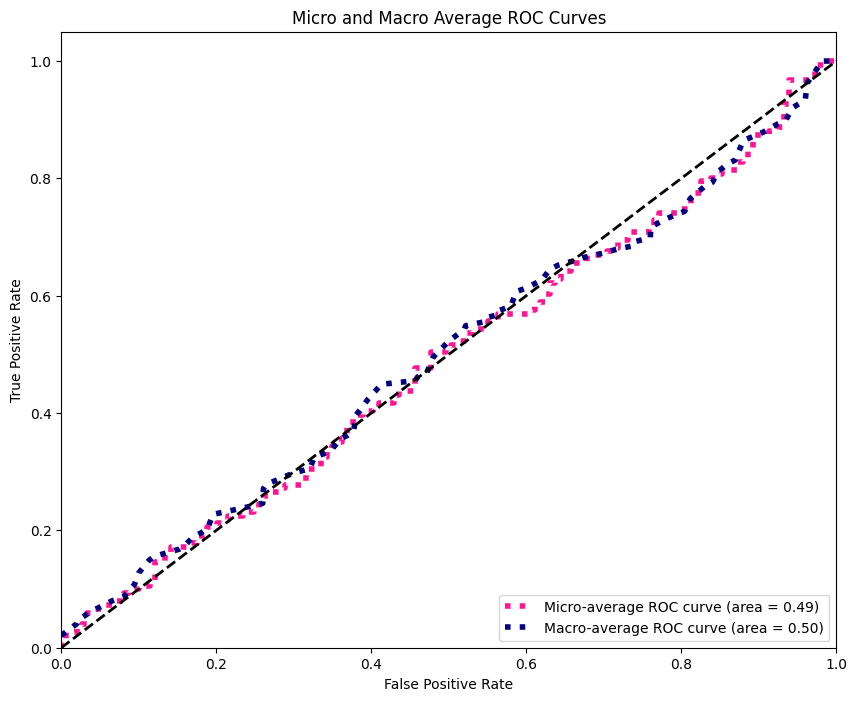

In [25]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp

y_test_genres = np.random.randint(0, 2, (100, 3))
y_pred_genres = np.random.rand(100, 3)

n_classes = y_test_genres.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_genres[:, i], y_pred_genres[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculating the micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_genres.ravel(), y_pred_genres.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Calculating the macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plotting
plt.figure(figsize=(10, 8))
lw = 2

plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro and Macro Average ROC Curves')
plt.legend(loc="lower right")

